# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


In [1]:
### Your code implementation goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.python.control_flow_ops = tf
%matplotlib inline

import csv

table = {}
with open('signnames.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        num, sign = row
        table[num] = sign

print(table)

{'34': 'Turn left ahead', '7': 'Speed limit (100km/h)', '25': 'Road work', '6': 'End of speed limit (80km/h)', '12': 'Priority road', '24': 'Road narrows on the right', '32': 'End of all speed and passing limits', '29': 'Bicycles crossing', '36': 'Go straight or right', '28': 'Children crossing', '8': 'Speed limit (120km/h)', '35': 'Ahead only', '40': 'Roundabout mandatory', '10': 'No passing for vechiles over 3.5 metric tons', '21': 'Double curve', '1': 'Speed limit (30km/h)', '16': 'Vechiles over 3.5 metric tons prohibited', '39': 'Keep left', '17': 'No entry', '9': 'No passing', '27': 'Pedestrians', '2': 'Speed limit (50km/h)', '13': 'Yield', '20': 'Dangerous curve to the right', '18': 'General caution', 'ClassId': 'SignName', '19': 'Dangerous curve to the left', '11': 'Right-of-way at the next intersection', '26': 'Traffic signals', '33': 'Turn right ahead', '15': 'No vechiles', '22': 'Bumpy road', '42': 'End of no passing by vechiles over 3.5 metric tons', '41': 'End of no passing

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the German Traffic Sign Dataset.

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
# Load pickled data
import pickle

# TODO: fill this in
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape, X_test.shape)

(39209, 32, 32, 3) (12630, 32, 32, 3)


In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

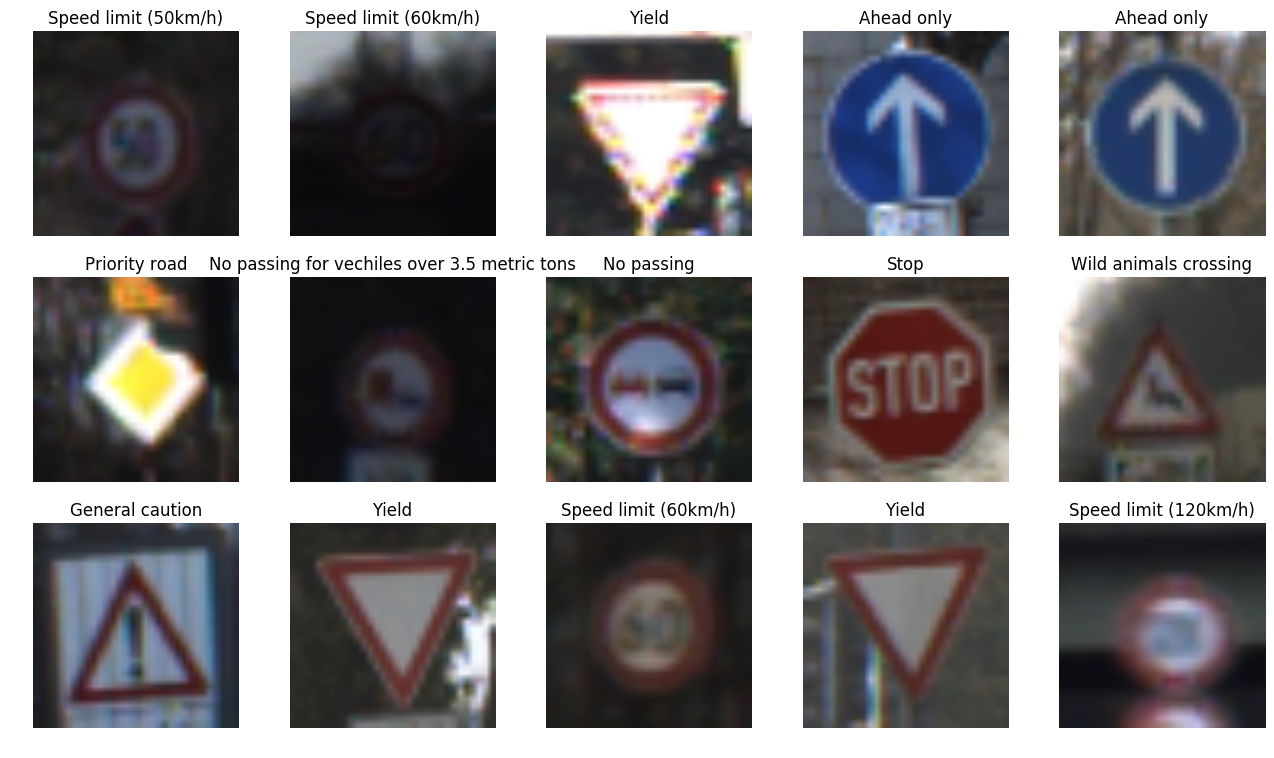

In [23]:
### Your code implementation goes here.
### Feel free to use as many code cells as needed.
plt.figure(figsize=[16, 9])

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(table[str(y_train[i])])

In [5]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [112]:
batch_size = 32
nb_classes = 43
nb_epoch = 20

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [114]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Epoch 1/20
39209/39209 [==============================] - 11s - loss: 3.0946 - acc: 0.1554 - val_loss: 1.9770 - val_acc: 0.3879
Epoch 2/20
39209/39209 [==============================] - 11s - loss: 2.0051 - acc: 0.3938 - val_loss: 1.3897 - val_acc: 0.5475
Epoch 3/20
39209/39209 [==============================] - 11s - loss: 1.5278 - acc: 0.5164 - val_loss: 0.9805 - val_acc: 0.6721
Epoch 4/20
39209/39209 [==============================] - 11s - loss: 1.1610 - acc: 0.6241 - val_loss: 0.6570 - val_acc: 0.8124
Epoch 5/20
39209/39209 [==============================] - 11s - loss: 0.8975 - acc: 0.7077 - val_loss: 0.4497 - val_acc: 0.8724
Epoch 6/20
39209/39209 [==============================] - 11s - loss: 0.7341 - acc: 0.7619 - val_loss: 0.3357 - val_acc: 0.9011
Epoch 7/20
39209/39209 [==============================] - 11s - loss: 0.5990 - acc: 0.8108 - val_loss: 0.2895 - val_acc: 0.9209
Epoch 8/20
39209/39209 [==============================] - 11s - loss: 0.5033 - acc: 0.8393 - val_loss: 0

In [115]:
model.save_weights('model.h5', overwrite=True)
with open('model.json', 'w') as f:
    f.write(model.to_json())

### Question 1

_What approach did you take in coming up with a solution to this problem?_

**Answer:**

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_


**Answer:**

### Question 3 

_Describe the techniques used to preprocess the data._

**Answer:**

### Question 4

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

### Question 5

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

---

## Step 3: Test a Model on Newly-Captured Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [116]:
### Your code implementation goes here.
### Feel free to use as many code cells as needed.

import cv2
from keras.models import model_from_json
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('model.h5')

In [117]:
def resize(img):
    fx = float(img_rows) / img.shape[0]
    fy = float(img_rows) / img.shape[1]
    fx = fy = min(fx, fy)
    img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
    outimg = np.zeros((img_rows, img_rows, img_channels), dtype=np.float32)
    w = img.shape[1]
    h = img.shape[0]
    x = (img_rows - w) / 2
    y = (img_rows - h) / 2
    outimg[y:y+h, x:x+w, :] = img
    return outimg


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


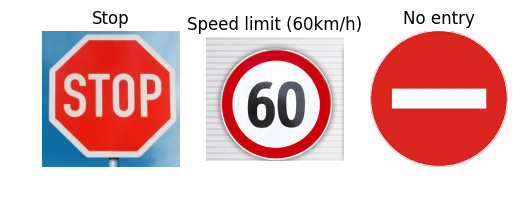

In [118]:
plt.figure()
for index, filename in enumerate(['test.jpg', 'test2.jpg', 'test3.jpg']):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    img /= 255
    x = resize(img)

    result = model.predict_classes([x.reshape((1, img_rows, img_rows, img_channels))], verbose=0)[0]
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    plt.title(table[str(result)])
    plt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_



**Answer:**

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

---

## Optional Step 4: Build an Application or Program for a Model (Optional)

Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified traffic signs and even the bounding boxes. You can find co-ordinates for bounding boxes in the [original dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.


Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).


### Optional Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Your code implementation goes here.
### Feel free to use as many code cells as needed.

### Documentation

Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.